### Ejercicio evaluación. Parte (I)
 
* Accede a la siguiente página web: https://www.basketball-reference.com/teams/TOR/2020.html
* Extrae la tabla `Per Game`
* Crea un dataframe con los datos de la misma
* Asigna los nombres de columna correctos, tal como aparecen en la tabla de la web, excepto la columna donde aparece el nombre de los jugadores. En ese caso, sigue las instrucciones del punto siguiente.
* En la columna con los nombres de los jugadores, asígnale el nombre `Player's Name`
 
**IMPORTANTE.**
 
**ENTREGA DEL TRABAJO:**
 
* Enviar por email
* **LÍMITE DE ENTREGA**. El email he de recibirlo antes de las 24:00 PM del lunes 7 de diciembre de 2020 (hora peninsular de España)
* **Los emails que se reciban más tarde de la hora fijada, NO SERÁN CONSIDERADOS**
 
**Añade comentarios en tus líneas de código para que se puedan entender los pasos que has seguido en el desarrollo del problema.**
 
Ejemplo:
 
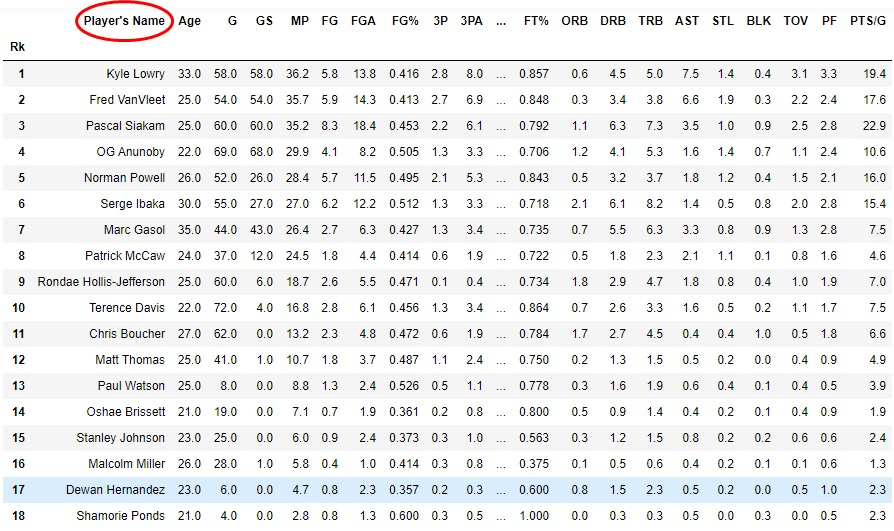

### Respuesta, a partir de aquí.

Paso 1: importar las librerias necesarias como: Pandas,requests y BeautifulSoup:
El contenido de la respuesta, el que contiene la página en HTML, será el que pasemos posteriormente a Beautiful Soup para generar el árbol de elementos y poder hacer consultas al mismo.

In [59]:
# Importando las librerias que vamos a utilizar.
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [60]:
# Enviando el request GET y guardando el contenido del response.
base_url = "https://www.basketball-reference.com/teams/TOR/2020.html"
res = requests.get(base_url)
content = res.content

PASO 2: El contenido de la página obtenido en el paso anterior será el que utilicemos para crear SOUP
, esto es, el árbol de objetos Python que representan al documento HTML.

In [207]:
# Construyendo el arbol de objetos HTML.
soup = BeautifulSoup(contenido, "html.parser")

# Buscando los objetos de tipo table
tablas = soup.find_all('table')

# Buscando las filas de cada tabla
lineas = [x for tabla in tablas for x in tabla.find_all('tr')]

In [208]:
lineas

[<tr>
 <th aria-label="Uniform Number" class="poptip sort_default_asc center" data-stat="number" data-tip="Uniform Number" scope="col">No.</th>
 <th aria-label="Player" class="poptip sort_default_asc center" data-stat="player" scope="col">Player</th>
 <th aria-label="Position" class="poptip sort_default_asc center" data-stat="pos" data-tip="Position" scope="col">Pos</th>
 <th aria-label="Height" class="poptip sort_default_asc center" data-stat="height" data-tip="Height" scope="col">Ht</th>
 <th aria-label="Weight" class="poptip sort_default_asc center" data-stat="weight" data-tip="Weight" scope="col">Wt</th>
 <th aria-label="Birth Date" class="poptip sort_default_asc center" data-stat="birth_date" scope="col">Birth Date</th>
 <th aria-label=" " class="poptip center" data-stat="birth_country" scope="col"> </th>
 <th aria-label="Years experience in NBA/ABA (prior to this season)" class="poptip sort_default_asc center" data-stat="years_experience" data-tip="Years experience in NBA/ABA (pr

Inspeccionando el contenido de la página para ver la tabla per_games

In [67]:
#buscamos el id per_games para encontrar la tabla 
Tabla=soup.find(id='per_games')
Tabla

In [68]:
#otra manera que encontre para buscar por ID es usando select
tabla_pergame = soup.select('[id$="div_per_game"] table')

In [69]:
print(tabla_pergame)

[<table class="sortable stats_table" data-cols-to-freeze="2" id="per_game"><caption>Per Game Table</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr>
<th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>
<th aria-label=" " class="poptip sort_default_asc center" data-stat="player" scope="col"> </th>
<th aria-label="Player's age on February 1 of the season" class="poptip sort_default_asc center" data-stat="age" data-tip="Player's age on February 1 of the season" scope="col">Age</th>
<th aria-label="Games" class="poptip center" data-stat="g" data-tip="Games" scope="col">G</th>
<th aria-label="Games Started" class="poptip center" data-stat="gs" data-tip="Games Started" scope="col">GS</th>
<th aria-label="Minutes Played Per Game" class="p

In [70]:
#ahora nos traemos las lineas de la tabla per_games
lineas = [x for tabla in tabla_pergame for x in tabla.find_all('tr')]

In [48]:
lineas

[<tr>
 <th aria-label="Rank" class="ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank" scope="col">Rk</th>
 <th aria-label=" " class="poptip sort_default_asc center" data-stat="player" scope="col"> </th>
 <th aria-label="Player's age on February 1 of the season" class="poptip sort_default_asc center" data-stat="age" data-tip="Player's age on February 1 of the season" scope="col">Age</th>
 <th aria-label="Games" class="poptip center" data-stat="g" data-tip="Games" scope="col">G</th>
 <th aria-label="Games Started" class="poptip center" data-stat="gs" data-tip="Games Started" scope="col">GS</th>
 <th aria-label="Minutes Played Per Game" class="poptip center" data-stat="mp_per_g" data-tip="Minutes Played Per Game" scope="col">MP</th>
 <th aria-label="Field Goals Per Game" class="poptip center" data-stat="fg_per_g" data-tip="Field Goals Per Game" scope="col">FG</th>
 <th aria-label="Field Goal Attempts Per Game" class="poptip center" data-st

In [71]:
#creamos una lista para toronto para construir el DataFrame
lista_toronto = []
temp_lista = []

for fila in lineas:
    for linea in fila.find_all('td'):
        temp_lista.append(linea.text) # El método text nos devuelve los datos/texto dentro del código html
    lista_toronto.append(temp_lista)
    temp_lista = []

lista_toronto[0:3]

[[],
 ['Kyle Lowry',
  '33',
  '58',
  '58',
  '36.2',
  '5.8',
  '13.8',
  '.416',
  '2.8',
  '8.0',
  '.352',
  '2.9',
  '5.8',
  '.504',
  '.518',
  '5.1',
  '5.9',
  '.857',
  '0.6',
  '4.5',
  '5.0',
  '7.5',
  '1.4',
  '0.4',
  '3.1',
  '3.3',
  '19.4'],
 ['Fred VanVleet',
  '25',
  '54',
  '54',
  '35.7',
  '5.9',
  '14.3',
  '.413',
  '2.7',
  '6.9',
  '.390',
  '3.2',
  '7.4',
  '.434',
  '.507',
  '3.1',
  '3.7',
  '.848',
  '0.3',
  '3.4',
  '3.8',
  '6.6',
  '1.9',
  '0.3',
  '2.2',
  '2.4',
  '17.6']]

In [72]:
#constuirmos el data frame per_game Toronto
pd.DataFrame(lista_toronto)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Kyle Lowry,33,58,58,36.2,5.8,13.8,.416,2.8,8.0,...,.857,0.6,4.5,5.0,7.5,1.4,0.4,3.1,3.3,19.4
2,Fred VanVleet,25,54,54,35.7,5.9,14.3,.413,2.7,6.9,...,.848,0.3,3.4,3.8,6.6,1.9,0.3,2.2,2.4,17.6
3,Pascal Siakam,25,60,60,35.2,8.3,18.4,.453,2.2,6.1,...,.792,1.1,6.3,7.3,3.5,1.0,0.9,2.5,2.8,22.9
4,OG Anunoby,22,69,68,29.9,4.1,8.2,.505,1.3,3.3,...,.706,1.2,4.1,5.3,1.6,1.4,0.7,1.1,2.4,10.6
5,Norman Powell,26,52,26,28.4,5.7,11.5,.495,2.1,5.3,...,.843,0.5,3.2,3.7,1.8,1.2,0.4,1.5,2.1,16.0
6,Serge Ibaka,30,55,27,27.0,6.2,12.2,.512,1.3,3.3,...,.718,2.1,6.1,8.2,1.4,0.5,0.8,2.0,2.8,15.4
7,Marc Gasol,35,44,43,26.4,2.7,6.3,.427,1.3,3.4,...,.735,0.7,5.5,6.3,3.3,0.8,0.9,1.3,2.8,7.5
8,Patrick McCaw,24,37,12,24.5,1.8,4.4,.414,0.6,1.9,...,.722,0.5,1.8,2.3,2.1,1.1,0.1,0.8,1.6,4.6
9,Rondae Hollis-Jefferson,25,60,6,18.7,2.6,5.5,.471,0.1,0.4,...,.734,1.8,2.9,4.7,1.8,0.8,0.4,1.0,1.9,7.0


In [73]:
#ahora amos a quitar los elementos none en las lineas 
toronto = [x for x in lista_toronto if len(x) > 0]
toronto

[['Kyle Lowry',
  '33',
  '58',
  '58',
  '36.2',
  '5.8',
  '13.8',
  '.416',
  '2.8',
  '8.0',
  '.352',
  '2.9',
  '5.8',
  '.504',
  '.518',
  '5.1',
  '5.9',
  '.857',
  '0.6',
  '4.5',
  '5.0',
  '7.5',
  '1.4',
  '0.4',
  '3.1',
  '3.3',
  '19.4'],
 ['Fred VanVleet',
  '25',
  '54',
  '54',
  '35.7',
  '5.9',
  '14.3',
  '.413',
  '2.7',
  '6.9',
  '.390',
  '3.2',
  '7.4',
  '.434',
  '.507',
  '3.1',
  '3.7',
  '.848',
  '0.3',
  '3.4',
  '3.8',
  '6.6',
  '1.9',
  '0.3',
  '2.2',
  '2.4',
  '17.6'],
 ['Pascal Siakam',
  '25',
  '60',
  '60',
  '35.2',
  '8.3',
  '18.4',
  '.453',
  '2.2',
  '6.1',
  '.359',
  '6.2',
  '12.3',
  '.499',
  '.512',
  '4.0',
  '5.1',
  '.792',
  '1.1',
  '6.3',
  '7.3',
  '3.5',
  '1.0',
  '0.9',
  '2.5',
  '2.8',
  '22.9'],
 ['OG Anunoby',
  '22',
  '69',
  '68',
  '29.9',
  '4.1',
  '8.2',
  '.505',
  '1.3',
  '3.3',
  '.390',
  '2.9',
  '4.9',
  '.583',
  '.584',
  '1.0',
  '1.5',
  '.706',
  '1.2',
  '4.1',
  '5.3',
  '1.6',
  '1.4',
  '0.7',

In [74]:
#nos quedamos con el DataFrame limpio 
toronto_limpio=pd.DataFrame(toronto)
toronto_limpio

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,Kyle Lowry,33,58,58,36.2,5.8,13.8,.416,2.8,8.0,...,.857,0.6,4.5,5.0,7.5,1.4,0.4,3.1,3.3,19.4
1,Fred VanVleet,25,54,54,35.7,5.9,14.3,.413,2.7,6.9,...,.848,0.3,3.4,3.8,6.6,1.9,0.3,2.2,2.4,17.6
2,Pascal Siakam,25,60,60,35.2,8.3,18.4,.453,2.2,6.1,...,.792,1.1,6.3,7.3,3.5,1.0,0.9,2.5,2.8,22.9
3,OG Anunoby,22,69,68,29.9,4.1,8.2,.505,1.3,3.3,...,.706,1.2,4.1,5.3,1.6,1.4,0.7,1.1,2.4,10.6
4,Norman Powell,26,52,26,28.4,5.7,11.5,.495,2.1,5.3,...,.843,0.5,3.2,3.7,1.8,1.2,0.4,1.5,2.1,16.0
5,Serge Ibaka,30,55,27,27.0,6.2,12.2,.512,1.3,3.3,...,.718,2.1,6.1,8.2,1.4,0.5,0.8,2.0,2.8,15.4
6,Marc Gasol,35,44,43,26.4,2.7,6.3,.427,1.3,3.4,...,.735,0.7,5.5,6.3,3.3,0.8,0.9,1.3,2.8,7.5
7,Patrick McCaw,24,37,12,24.5,1.8,4.4,.414,0.6,1.9,...,.722,0.5,1.8,2.3,2.1,1.1,0.1,0.8,1.6,4.6
8,Rondae Hollis-Jefferson,25,60,6,18.7,2.6,5.5,.471,0.1,0.4,...,.734,1.8,2.9,4.7,1.8,0.8,0.4,1.0,1.9,7.0
9,Terence Davis,22,72,4,16.8,2.8,6.1,.456,1.3,3.4,...,.864,0.7,2.6,3.3,1.6,0.5,0.2,1.1,1.7,7.5


Ahora usamos los elementos th de la primera fila de la tabla toronto_limpio para extraer nombres para las columnas de la tabla.

In [75]:
soup.find('th')

<th aria-label="Uniform Number" class="poptip sort_default_asc center" data-stat="number" data-tip="Uniform Number" scope="col">No.</th>

In [76]:
col = []
table = soup.find_all("table", id="per_game")

for i in table[0].select("tr")[0].find_all('th'):
    if(i.text != '\xa0'):
        col.append(i.text)
    else:
        col.append("Player's Name")

col[1:28]

["Player's Name",
 'Age',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS/G']

In [77]:
toronto_limpio.index.name = col[0]

toronto_limpio.columns=col[1:28]
toronto_limpio

,Player's Name,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G
Rk,,,,,,,,,,,,,,,,,,,,,
0,Kyle Lowry,33,58,58,36.2,5.8,13.8,.416,2.8,8.0,...,.857,0.6,4.5,5.0,7.5,1.4,0.4,3.1,3.3,19.4
1,Fred VanVleet,25,54,54,35.7,5.9,14.3,.413,2.7,6.9,...,.848,0.3,3.4,3.8,6.6,1.9,0.3,2.2,2.4,17.6
2,Pascal Siakam,25,60,60,35.2,8.3,18.4,.453,2.2,6.1,...,.792,1.1,6.3,7.3,3.5,1.0,0.9,2.5,2.8,22.9
3,OG Anunoby,22,69,68,29.9,4.1,8.2,.505,1.3,3.3,...,.706,1.2,4.1,5.3,1.6,1.4,0.7,1.1,2.4,10.6
4,Norman Powell,26,52,26,28.4,5.7,11.5,.495,2.1,5.3,...,.843,0.5,3.2,3.7,1.8,1.2,0.4,1.5,2.1,16.0
5,Serge Ibaka,30,55,27,27.0,6.2,12.2,.512,1.3,3.3,...,.718,2.1,6.1,8.2,1.4,0.5,0.8,2.0,2.8,15.4
6,Marc Gasol,35,44,43,26.4,2.7,6.3,.427,1.3,3.4,...,.735,0.7,5.5,6.3,3.3,0.8,0.9,1.3,2.8,7.5
7,Patrick McCaw,24,37,12,24.5,1.8,4.4,.414,0.6,1.9,...,.722,0.5,1.8,2.3,2.1,1.1,0.1,0.8,1.6,4.6
8,Rondae Hollis-Jefferson,25,60,6,18.7,2.6,5.5,.471,0.1,0.4,...,.734,1.8,2.9,4.7,1.8,0.8,0.4,1.0,1.9,7.0


In [118]:
toronto2 = toronto_limpio
type(toronto_limpio['Age'][0])
toronto_limpio['Age'] = toronto_limpio['Age'].astype(float)
toronto_limpio['G'] = toronto_limpio['G'].astype(float)
toronto_limpio['GS'] = toronto_limpio['GS'].astype(float)

toronto_limpio['MP'] = toronto_limpio['MP'].astype(float)
toronto_limpio['FG'] = toronto_limpio['FG'].astype(float)
toronto_limpio['FGA'] = toronto_limpio['FGA'].astype(float)
toronto_limpio['FG%'] = toronto_limpio['FG%'].astype(float)
toronto_limpio['3P'] = toronto_limpio['3P'].astype(float)
toronto_limpio['3PA'] = toronto_limpio['3PA'].astype(float)
toronto_limpio['3P%'] = toronto_limpio['3P%'].astype(float)
toronto_limpio['2P'] = toronto_limpio['2P'].astype(float)
toronto_limpio['2PA'] = toronto_limpio['2PA'].astype(float)
toronto_limpio['2P%'] = toronto_limpio['2P%'].astype(float)
toronto_limpio['eFG%'] = toronto_limpio['eFG%'].astype(float)
toronto_limpio['FT'] = toronto_limpio['FT'].astype(float)
toronto_limpio['FT%'] = toronto_limpio['FT%'].astype(float)
toronto_limpio['FTA'] = toronto_limpio['FTA'].astype(float)
toronto_limpio['ORB'] = toronto_limpio['ORB'].astype(float)
toronto_limpio['DRB'] = toronto_limpio['DRB'].astype(float)
toronto_limpio['TRB'] = toronto_limpio['TRB'].astype(float)
toronto_limpio['AST'] = toronto_limpio['AST'].astype(float)
toronto_limpio['STL'] = toronto_limpio['STL'].astype(float)
toronto_limpio['BLK'] = toronto_limpio['BLK'].astype(float)
toronto_limpio['TOV'] = toronto_limpio['TOV'].astype(float)
toronto_limpio['PF'] = toronto_limpio['PF'].astype(float)
toronto_limpio['PTS/G'] = toronto_limpio['PTS/G'].astype(float)

toronto_limpio

,Player's Name,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G
Rk,,,,,,,,,,,,,,,,,,,,,
0,Kyle Lowry,33.0,58.0,58.0,36.2,5.8,13.8,0.416,2.8,8.0,...,0.857,0.6,4.5,5.0,7.5,1.4,0.4,3.1,3.3,19.4
1,Fred VanVleet,25.0,54.0,54.0,35.7,5.9,14.3,0.413,2.7,6.9,...,0.848,0.3,3.4,3.8,6.6,1.9,0.3,2.2,2.4,17.6
2,Pascal Siakam,25.0,60.0,60.0,35.2,8.3,18.4,0.453,2.2,6.1,...,0.792,1.1,6.3,7.3,3.5,1.0,0.9,2.5,2.8,22.9
3,OG Anunoby,22.0,69.0,68.0,29.9,4.1,8.2,0.505,1.3,3.3,...,0.706,1.2,4.1,5.3,1.6,1.4,0.7,1.1,2.4,10.6
4,Norman Powell,26.0,52.0,26.0,28.4,5.7,11.5,0.495,2.1,5.3,...,0.843,0.5,3.2,3.7,1.8,1.2,0.4,1.5,2.1,16.0
5,Serge Ibaka,30.0,55.0,27.0,27.0,6.2,12.2,0.512,1.3,3.3,...,0.718,2.1,6.1,8.2,1.4,0.5,0.8,2.0,2.8,15.4
6,Marc Gasol,35.0,44.0,43.0,26.4,2.7,6.3,0.427,1.3,3.4,...,0.735,0.7,5.5,6.3,3.3,0.8,0.9,1.3,2.8,7.5
7,Patrick McCaw,24.0,37.0,12.0,24.5,1.8,4.4,0.414,0.6,1.9,...,0.722,0.5,1.8,2.3,2.1,1.1,0.1,0.8,1.6,4.6
8,Rondae Hollis-Jefferson,25.0,60.0,6.0,18.7,2.6,5.5,0.471,0.1,0.4,...,0.734,1.8,2.9,4.7,1.8,0.8,0.4,1.0,1.9,7.0


In [204]:
import numpy as np

#print(toronto_limpio.columns)
arr = toronto_limpio[['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
                      '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
                      'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS/G']].to_numpy()

maxColumn = []
minColumn = []
medianColumn = []
meanColumn = []
stdColumn = []
varColumn = []
rangeColumn = []

for a in arr:
    maxColumn.append(np.max(a))
    minColumn.append(np.min(a))
    rangeColumn.append(np.max(a) - np.min(a))    
    medianColumn.append(np.median(a))
    meanColumn.append(np.mean(a))
    stdColumn.append(np.std(a))
    varColumn.append(np.var(a))
    
toronto_limpio['Maximo'] = maxColumn
toronto_limpio['Minimo'] = minColumn
toronto_limpio['Rango'] = rangeColumn
toronto_limpio['Mediana'] = medianColumn
toronto_limpio['Media'] = meanColumn
toronto_limpio['D.Std'] = stdColumn
toronto_limpio['Var'] = varColumn

In [199]:
arr = []

for c in toronto_limpio.columns[1:]:
    arr.append(toronto_limpio[c].to_numpy())

maxRow = ['Maximo']
minRow = ['Minimo']
medianRow = ['Mediana']
meanRow = ['Media']
stdRow = ['D.Std']
varRow = ['Var']
rangeRow = ['Rango']

for a in arr:
    maxRow.append(np.max(a))
    minRow.append(np.min(a))
    rangeRow.append(np.max(a) - np.min(a))
    medianRow.append(np.median(a))        
    meanRow.append(np.mean(a))        
    stdRow.append(np.std(a))
    varRow.append(np.var(a))

df2 = pd.DataFrame([maxRow], columns=toronto_limpio.columns)
toronto_limpio = toronto_limpio.append(df2, ignore_index=True)

df2 = pd.DataFrame([minRow], columns=toronto_limpio.columns)
toronto_limpio = toronto_limpio.append(df2, ignore_index=True)

df2 = pd.DataFrame([rangeRow], columns=toronto_limpio.columns)
toronto_limpio = toronto_limpio.append(df2, ignore_index=True)

df2 = pd.DataFrame([medianRow], columns=toronto_limpio.columns)
toronto_limpio = toronto_limpio.append(df2, ignore_index=True)

df2 = pd.DataFrame([meanRow], columns=toronto_limpio.columns)
toronto_limpio = toronto_limpio.append(df2, ignore_index=True)

df2 = pd.DataFrame([stdRow], columns=toronto_limpio.columns)
toronto_limpio = toronto_limpio.append(df2, ignore_index=True)

df2 = pd.DataFrame([varRow], columns=toronto_limpio.columns)
toronto_limpio = toronto_limpio.append(df2, ignore_index=True)

toronto_limpio

,Player's Name,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G
0,Kyle Lowry,33.000000,58.000000,58.000000,36.200000,5.800000,13.800000,0.416000,2.800000,8.000000,...,0.857000,0.600000,4.500000,5.000000,7.500000,1.400000,0.400000,3.100000,3.300000,19.400000
1,Fred VanVleet,25.000000,54.000000,54.000000,35.700000,5.900000,14.300000,0.413000,2.700000,6.900000,...,0.848000,0.300000,3.400000,3.800000,6.600000,1.900000,0.300000,2.200000,2.400000,17.600000
2,Pascal Siakam,25.000000,60.000000,60.000000,35.200000,8.300000,18.400000,0.453000,2.200000,6.100000,...,0.792000,1.100000,6.300000,7.300000,3.500000,1.000000,0.900000,2.500000,2.800000,22.900000
3,OG Anunoby,22.000000,69.000000,68.000000,29.900000,4.100000,8.200000,0.505000,1.300000,3.300000,...,0.706000,1.200000,4.100000,5.300000,1.600000,1.400000,0.700000,1.100000,2.400000,10.600000
4,Norman Powell,26.000000,52.000000,26.000000,28.400000,5.700000,11.500000,0.495000,2.100000,5.300000,...,0.843000,0.500000,3.200000,3.700000,1.800000,1.200000,0.400000,1.500000,2.100000,16.000000
5,Serge Ibaka,30.000000,55.000000,27.000000,27.000000,6.200000,12.200000,0.512000,1.300000,3.300000,...,0.718000,2.100000,6.100000,8.200000,1.400000,0.500000,0.800000,2.000000,2.800000,15.400000
6,Marc Gasol,35.000000,44.000000,43.000000,26.400000,2.700000,6.300000,0.427000,1.300000,3.400000,...,0.735000,0.700000,5.500000,6.300000,3.300000,0.800000,0.900000,1.300000,2.800000,7.500000
7,Patrick McCaw,24.000000,37.000000,12.000000,24.500000,1.800000,4.400000,0.414000,0.600000,1.900000,...,0.722000,0.500000,1.800000,2.300000,2.100000,1.100000,0.100000,0.800000,1.600000,4.600000
8,Rondae Hollis-Jefferson,25.000000,60.000000,6.000000,18.700000,2.600000,5.500000,0.471000,0.100000,0.400000,...,0.734000,1.800000,2.900000,4.700000,1.800000,0.800000,0.400000,1.000000,1.900000,7.000000
9,Terence Davis,22.000000,72.000000,4.000000,16.800000,2.800000,6.100000,0.456000,1.300000,3.400000,...,0.864000,0.700000,2.600000,3.300000,1.600000,0.500000,0.200000,1.100000,1.700000,7.500000


In [206]:
#toronto_limpio.drop(toronto_limpio.tail(1).index,inplace=True)
toronto_limpio.iloc[18:,27:]="NaN"
toronto_limpio

,Player's Name,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,TOV,PF,PTS/G,Maximo,Minimo,Rango,Mediana,Media,D.Std,Var
0,Kyle Lowry,33.000000,58.000000,58.000000,36.200000,5.800000,13.800000,0.416000,2.800000,8.000000,...,3.100000,3.300000,19.400000,58,0.352,57.648,4.75,10.8903,16.3438,267.118
1,Fred VanVleet,25.000000,54.000000,54.000000,35.700000,5.900000,14.300000,0.413000,2.700000,6.900000,...,2.200000,2.400000,17.600000,54,0.3,53.7,3.3,9.88431,15.1518,229.577
2,Pascal Siakam,25.000000,60.000000,60.000000,35.200000,8.300000,18.400000,0.453000,2.200000,6.100000,...,2.500000,2.800000,22.900000,60,0.359,59.641,4.55,11.2967,16.4965,272.134
3,OG Anunoby,22.000000,69.000000,68.000000,29.900000,4.100000,8.200000,0.505000,1.300000,3.300000,...,1.100000,2.400000,10.600000,69,0.39,68.61,2,9.51031,18.3093,335.23
4,Norman Powell,26.000000,52.000000,26.000000,28.400000,5.700000,11.500000,0.495000,2.100000,5.300000,...,1.500000,2.100000,16.000000,52,0.399,51.601,2.7,7.90762,12.0811,145.953
5,Serge Ibaka,30.000000,55.000000,27.000000,27.000000,6.200000,12.200000,0.512000,1.300000,3.300000,...,2.000000,2.800000,15.400000,55,0.385,54.615,2.55,8.53223,12.6558,160.17
6,Marc Gasol,35.000000,44.000000,43.000000,26.400000,2.700000,6.300000,0.427000,1.300000,3.400000,...,1.300000,2.800000,7.500000,44,0.385,43.615,2.05,7.69419,12.9951,168.873
7,Patrick McCaw,24.000000,37.000000,12.000000,24.500000,1.800000,4.400000,0.414000,0.600000,1.900000,...,0.800000,1.600000,4.600000,37,0.1,36.9,1.4,4.92804,9.05652,82.0205
8,Rondae Hollis-Jefferson,25.000000,60.000000,6.000000,18.700000,2.600000,5.500000,0.471000,0.100000,0.400000,...,1.000000,1.900000,7.000000,60,0.1,59.9,1.85,5.95031,12.1864,148.508
9,Terence Davis,22.000000,72.000000,4.000000,16.800000,2.800000,6.100000,0.456000,1.300000,3.400000,...,1.100000,1.700000,7.500000,72,0.2,71.8,1.55,6.00435,14.1162,199.266


### Ejercicio evaluación. Parte ( II )

### Ejercicios evaluación
 
Empleando **Numpy** para los valores de la tabla anterior, calcula (por cada jugador y por cada concepto de la tabla (fila/columna):
* El máximo
* El mínimo
* El rango
* La mediana
* La media aritmética
* La desviación estándar
* La varianza

### Dataframe final
 
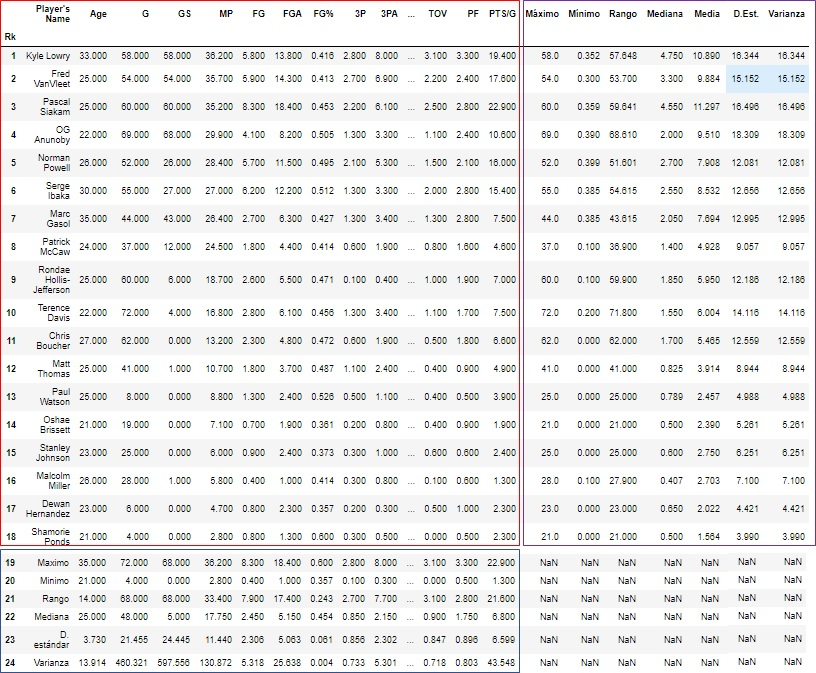

### Respuesta a partir de aquí

### **IMPORTANTE**
 
**ENTREGA DEL TRABAJO:**
 
* Enviar por email
* **LÍMITE DE ENTREGA**. El email he de recibirlo antes de las 24:00 PM del lunes 7 de diciembre de 2020 (hora peninsular de España)
* **Los emails que se reciban más tarde de la hora fijada, NO SERÁN CONSIDERADOS**
 
**Añade comentarios en tus líneas de código para que se puedan entender los pasos que has seguido en el desarrollo del problema.**
 
**Recuerda incorporar comentarios a tus líneas de código explicando los pasos que has seguido en la resolución del problema**